In [1]:
import os
import pandas as pd
import numpy as np
import pingouin as pg
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt

##### Load data

In [2]:
path_img_out = '/media/hcs-psy-narun/Alina/HCP_results/predicted_values_for_datasets_5/plots_article/plots_feat_dud45/'

In [3]:
pth = '/media/data/Dunedin_Study_Data_Narun_P_Jan2022/MLTabs_retest/output_retest_newADJ_Onetrain_stackSTD_5cv_new_fsiq45/'

#### Stacked models

In [4]:
#load tables with stacked y_pred
dff1 = pd.read_csv(pth+'3level_retest1_y_pred_stacked.csv', index_col=0)
dff2 = pd.read_csv(pth+'3level_retest2_y_pred_stacked.csv', index_col=0)

##### Calculate ICC (stacked)

In [5]:
#reorganize the table and calculate ICC
i = 0
dct_icc={}
while i < len(dff1.columns):
    #create tables for pingouin format
    df1=dff1.iloc[:,i]
    df2=dff2.iloc[:,i]
    df_comp = pd.DataFrame({'subj': np.append(df1.index, df2.index),
                            'trial': np.append(np.full(len(df1.index), 1), np.full(len(df2.index), 2)),
                            'scores': np.array(pd.concat([df1, df2], axis=0))})
    
    icc_table = pg.intraclass_corr(data = df_comp, targets='subj', raters='trial', ratings='scores')
    
    dct_icc[dff1.iloc[:,i].name] = pd.Series({'ICC2' : icc_table.iloc[1,2], 
                                                                        'ICC3' : icc_table.iloc[2,2],
                                                                        'CI2' : icc_table.iloc[1,7], 
                                                                        'CI3' : icc_table.iloc[2,7]} )
    
    i+=1
    
df_icc = pd.DataFrame(dct_icc).T

In [7]:
#labels
labels = [
'Stacked: All', #1
'Stacked: Task Contrast', #2
'Stacked: Non Task',#3
'Stacked: Task FC',#4
'Stacked: Task Contrast & Task FC',#5
'Stacked: All excluding Task FC',#6
'Stacked: All excluding Task Contrast',#7
'Stacked: Resting and Task FC' #8   
]

In [8]:
df_icc.index = labels

In [9]:
df_icc.sort_values(by='ICC3', ascending=False)

,ICC2,ICC3,CI2,CI3
Stacked: Non Task,0.908349,0.908323,"[0.79, 0.96]","[0.78, 0.96]"
Stacked: All excluding Task Contrast,0.872235,0.902463,"[0.62, 0.95]","[0.77, 0.96]"
Stacked: All,0.893064,0.891873,"[0.75, 0.96]","[0.75, 0.96]"
Stacked: Task Contrast & Task FC,0.852589,0.869917,"[0.65, 0.94]","[0.7, 0.95]"
Stacked: All excluding Task FC,0.836816,0.83022,"[0.63, 0.93]","[0.62, 0.93]"
Stacked: Resting and Task FC,0.665792,0.794894,"[0.05, 0.88]","[0.55, 0.91]"
Stacked: Task Contrast,0.774836,0.765896,"[0.51, 0.9]","[0.5, 0.9]"
Stacked: Task FC,0.437235,0.583217,"[-0.05, 0.75]","[0.2, 0.81]"


#### Single modality models

In [10]:
#load tables with stacked y_pred
dff1s = pd.read_csv(pth+'3level_retest1_y_pred_singleML.csv', index_col=0)
dff2s = pd.read_csv(pth+'3level_retest2_y_pred_singleML.csv', index_col=0)

##### Calculate ICC (single)

In [11]:
#reorganize the table and calculate ICC
i = 0
dct_iccs={}
while i < len(dff1s.columns):
    #create tables for pingouin format
    df1=dff1s.iloc[:,i]
    df2=dff2s.iloc[:,i]
    df_comp = pd.DataFrame({'subj': np.append(df1.index, df2.index),
                            'trial': np.append(np.full(len(df1.index), 1), np.full(len(df2.index), 2)),
                            'scores': np.array(pd.concat([df1, df2], axis=0))})
    
    icc_table = pg.intraclass_corr(data = df_comp, targets='subj', raters='trial', ratings='scores')
    
    dct_iccs[dff1s.iloc[:,i].name] = pd.Series({'ICC2' : icc_table.iloc[1,2], 
                                                'ICC3' : icc_table.iloc[2,2],
                                                'CI2' : icc_table.iloc[1,7], 
                                                'CI3' : icc_table.iloc[2,7]} )
    
    i+=1
    
df_iccs = pd.DataFrame(dct_iccs).T

In [13]:
#labels
labelss = [
'Stroop Contrast',
'Emotion Processing Contrast',
'Facename: Encoding-Distractor',
'MID Contrast',
'Stroop FC',
'Emotion Processing FC',
'Facename FC',
'MID FC',
'Cortical Thickness',
'Surface Area', 
'Subcortical Volume',
'Resting State FC', 
'Total Brain Volume'    
]

In [14]:
df_iccs.index = labelss

In [15]:
df_iccs.sort_values(by='ICC3', ascending=False)

,ICC2,ICC3,CI2,CI3
Subcortical Volume,0.984659,0.985365,"[0.96, 0.99]","[0.96, 0.99]"
Total Brain Volume,0.984354,0.984396,"[0.96, 0.99]","[0.96, 0.99]"
Surface Area,0.976664,0.975508,"[0.94, 0.99]","[0.94, 0.99]"
Cortical Thickness,0.86713,0.878908,"[0.69, 0.95]","[0.72, 0.95]"
MID FC,0.672731,0.719925,"[0.31, 0.86]","[0.42, 0.88]"
Resting State FC,0.641101,0.629272,"[0.28, 0.84]","[0.27, 0.83]"
Emotion Processing Contrast,0.626884,0.614882,"[0.26, 0.83]","[0.25, 0.83]"
Stroop FC,0.555421,0.57893,"[0.18, 0.79]","[0.19, 0.81]"
Facename: Encoding-Distractor,0.553482,0.573981,"[0.18, 0.79]","[0.19, 0.81]"
Emotion Processing FC,0.332442,0.361119,"[-0.07, 0.66]","[-0.09, 0.69]"


##### Concat icc tables into one

In [17]:
pd.concat([df_iccs, df_icc], axis=0).sort_values(by="ICC3", ascending=False)

,ICC2,ICC3,CI2,CI3
Subcortical Volume,0.984659,0.985365,"[0.96, 0.99]","[0.96, 0.99]"
Total Brain Volume,0.984354,0.984396,"[0.96, 0.99]","[0.96, 0.99]"
Surface Area,0.976664,0.975508,"[0.94, 0.99]","[0.94, 0.99]"
Stacked: Non Task,0.908349,0.908323,"[0.79, 0.96]","[0.78, 0.96]"
Stacked: All excluding Task Contrast,0.872235,0.902463,"[0.62, 0.95]","[0.77, 0.96]"
Stacked: All,0.893064,0.891873,"[0.75, 0.96]","[0.75, 0.96]"
Cortical Thickness,0.86713,0.878908,"[0.69, 0.95]","[0.72, 0.95]"
Stacked: Task Contrast & Task FC,0.852589,0.869917,"[0.65, 0.94]","[0.7, 0.95]"
Stacked: All excluding Task FC,0.836816,0.83022,"[0.63, 0.93]","[0.62, 0.93]"
Stacked: Resting and Task FC,0.665792,0.794894,"[0.05, 0.88]","[0.55, 0.91]"


##### Plot ICC

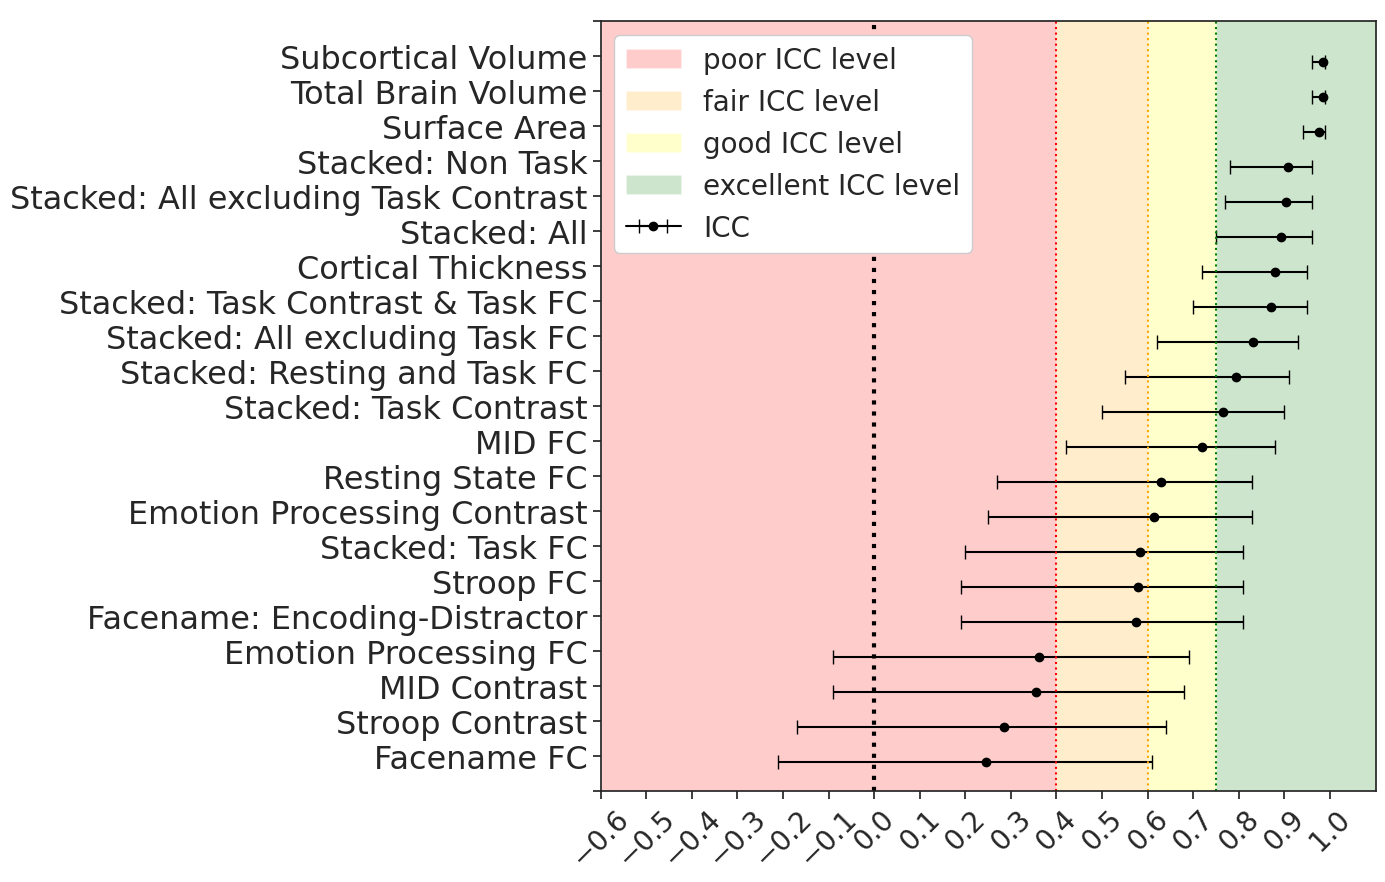

In [20]:
df_plot = pd.concat([df_iccs, df_icc], axis=0).sort_values(by="ICC3", ascending=False)



inum = len(df_plot.index)+2

sns.set_color_codes()
fig, ax = plt.subplots(figsize=(10,10))
#ax.grid(False)
#plt.figure(figsize=(10,7))
#sns.set_style("ticks")
"""for i in range(len(df_plot.index)):
    y = df_plot.sort_values(by="ICC2", ascending=False).index[i]
    x = df_plot.loc[y,'ICC2']
    xerr = abs(df_plot.loc[y,'CI2'].reshape(2,1) - x)
    #plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='blue', label="ICC2")
    if i==0:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='b', label="ICC(2,1)")
    else:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)+0.15, xerr=xerr, marker='o',capsize=5, color='b')"""

for i in range(len(df_plot.index)):
    y = df_plot.sort_values(by="ICC3", ascending=False).index[i]
    x = df_plot.loc[y,'ICC3']
    xerr = abs(df_plot.loc[y,'CI3'].reshape(2,1) - x)
    #plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='red', label="ICC3") 
    if i==0:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='black', label="ICC")
    else:
        fig = plt.errorbar(x=x, y=(len(df_plot.index)-i)-0.15, xerr=xerr, marker='o',capsize=5, color='black')

plt.axvline(x=0.75, ymax=inum, c='green', linestyle=':')
plt.axvline(x=0.6, ymax=inum, c='orange', linestyle=':')
plt.axvline(x=0.4, ymax=inum, c='red', linestyle=':')
plt.axvline(x=0, ymax=inum, c='black', linestyle=':', linewidth=3)

ax.margins(0)
ax.axvspan(xmin=-0.6, xmax = 0.4, ymax=inum, facecolor='red', alpha=0.2, label='poor ICC level')
ax.axvspan(xmin=0.4, xmax = 0.6, ymax=inum, facecolor='orange', alpha=0.2, label='fair ICC level')
ax.axvspan(xmin=0.6, xmax = 0.75, ymax=inum, facecolor='yellow', alpha=0.2,label='good ICC level')
ax.axvspan(xmin=0.75, xmax = 1.1, ymax=inum, facecolor='green', alpha=0.2,label='excellent ICC level')

plt.xlim((-0.6, 1.1))

plt.xticks(np.arange(-0.6, 1.1, 0.1).round(2).tolist(), fontsize=20, rotation=45)
plt.yticks(range(0,inum,1), 
           np.append(np.append(np.array([' ']), np.array(df_plot.sort_values(by="ICC3", ascending=True).index)), np.array([' '])), fontsize=23)
plt.legend(fontsize=20,loc='upper left', framealpha=1)
#plt.title('Test-Retest Reliability of\nPredicted General Cognition Scores', 
#          fontsize=32, loc='left')

plt.savefig(path_img_out+'icc_all_mods_plot_image.svg',bbox_inches='tight')

plt.show()

##### Plot sessions values

In [19]:
dff1.columns = labels
dff2.columns = labels

dff1s.columns = labelss
dff2s.columns = labelss

In [20]:
run1 = pd.concat([dff1, dff1s], axis=1)
run2 = pd.concat([dff2, dff2s], axis=1)

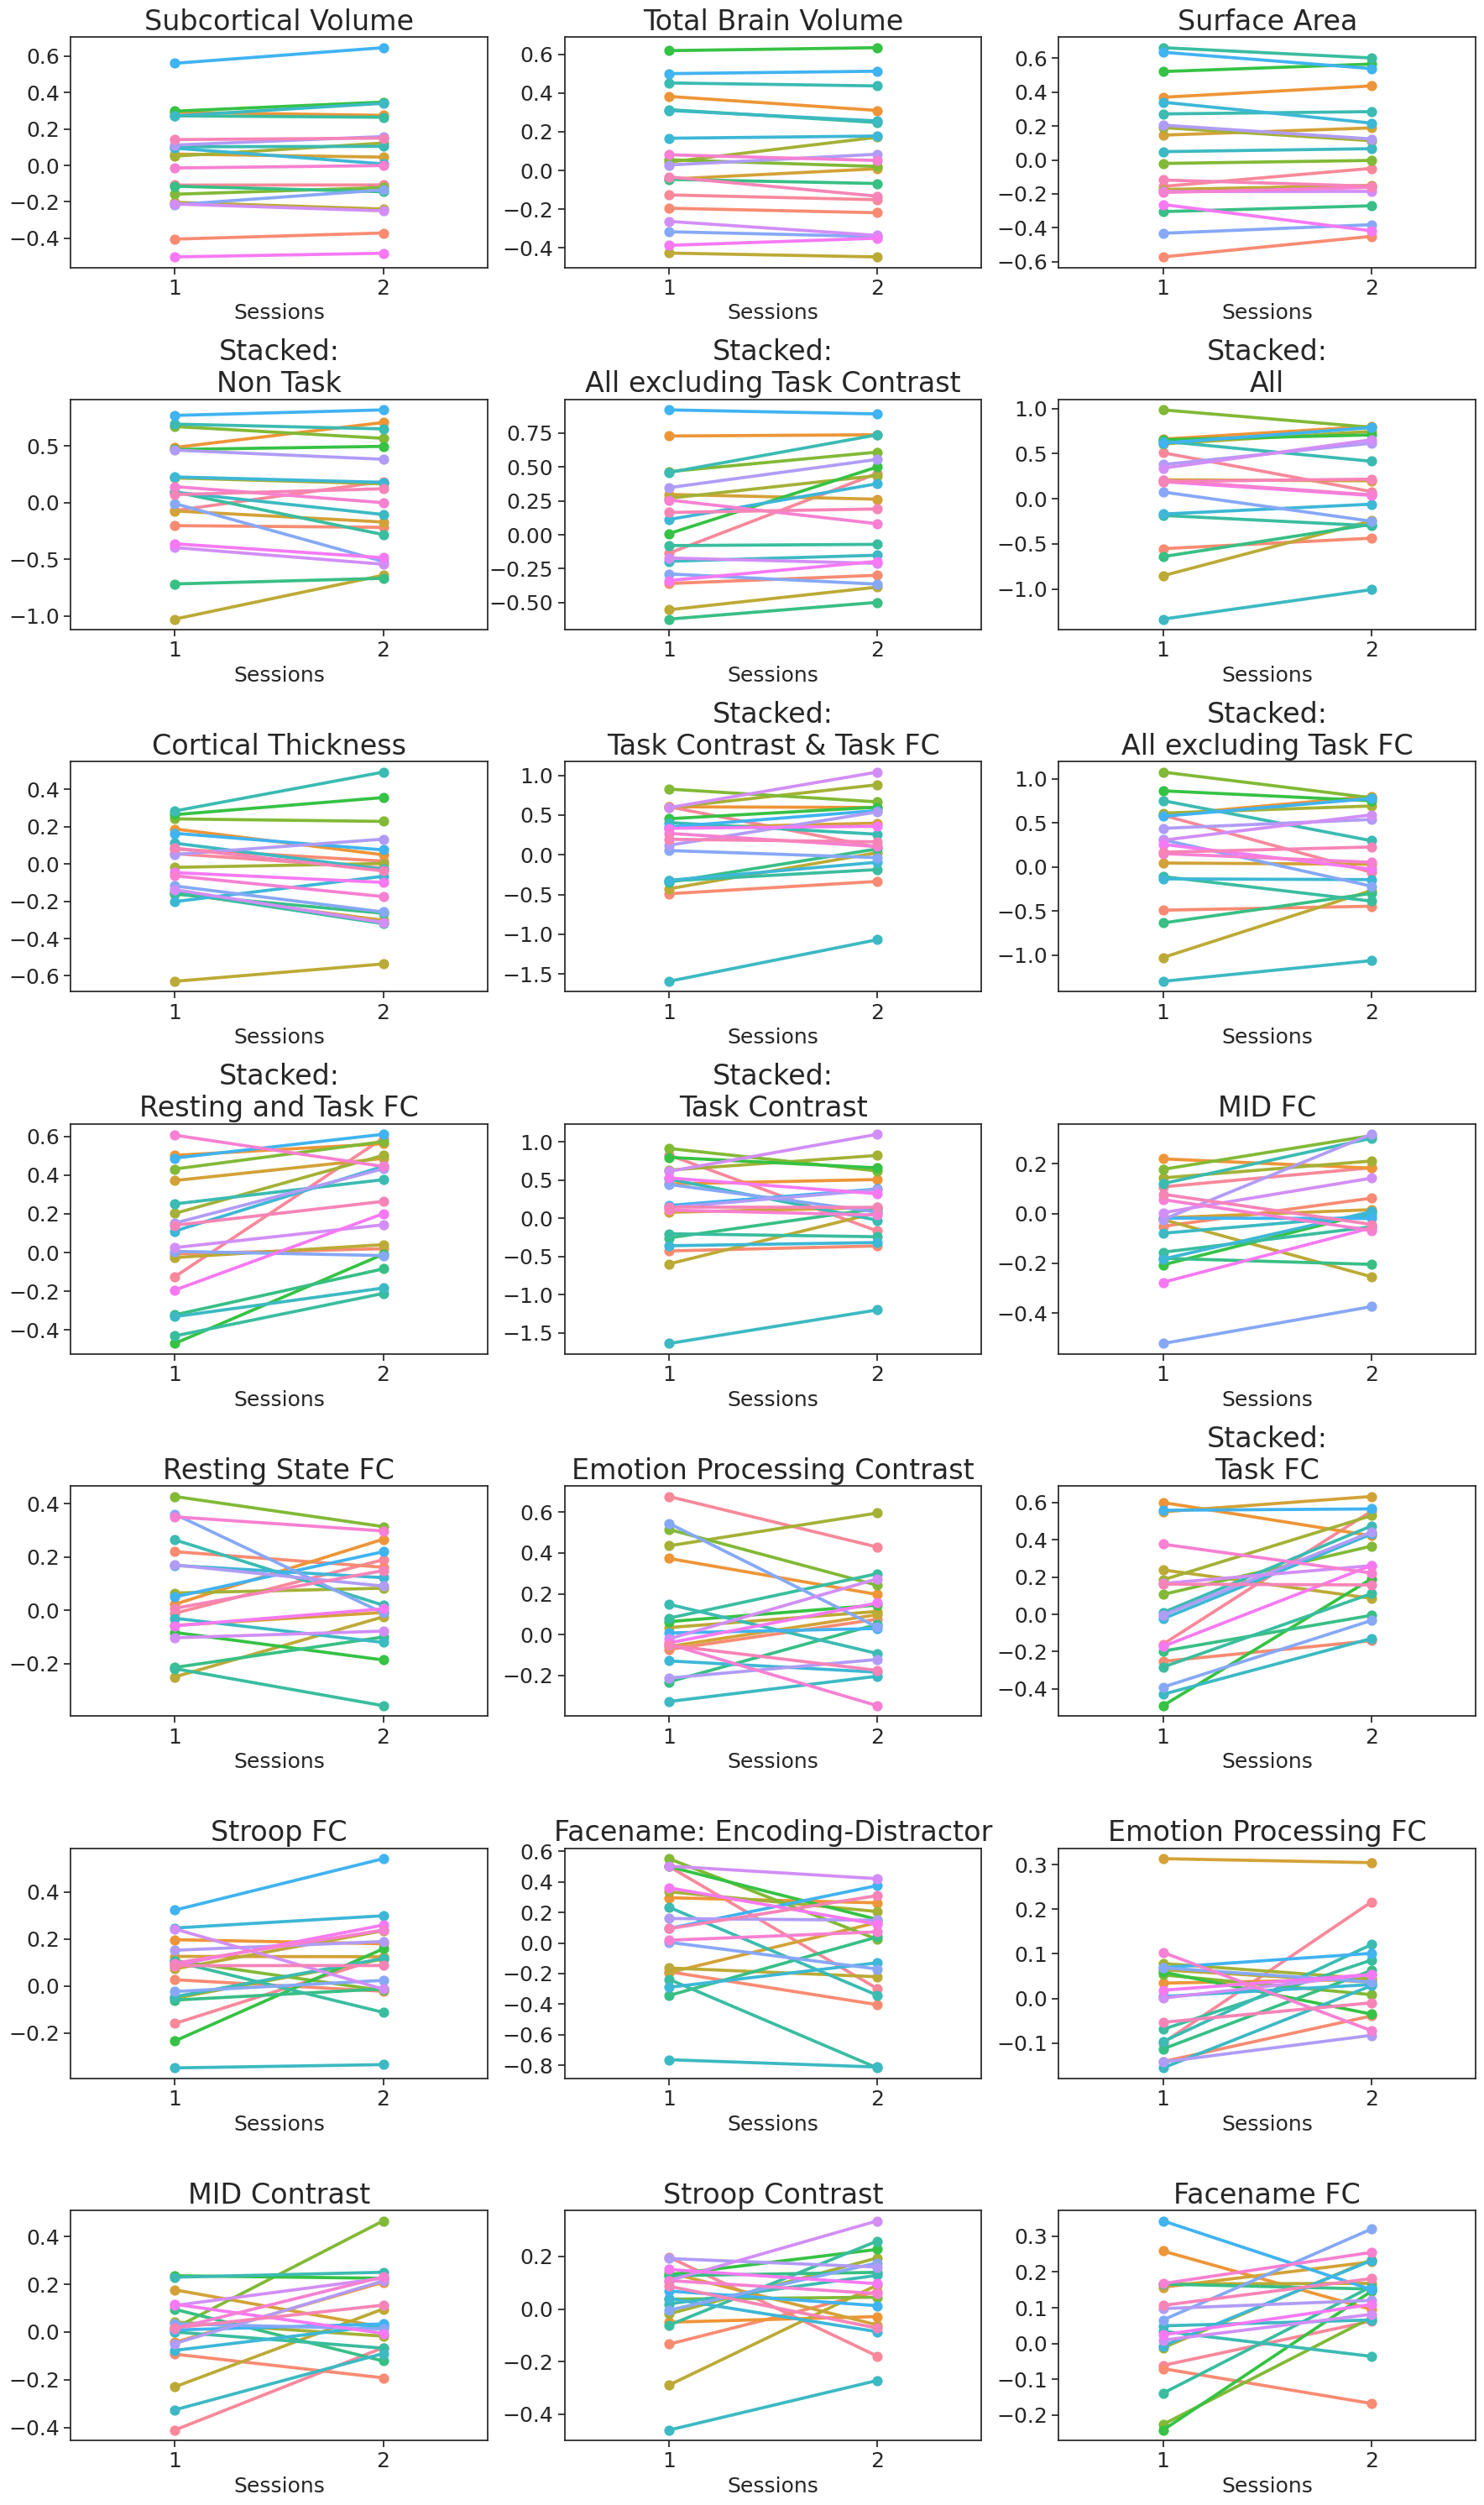

In [21]:
fig = plt.figure(figsize=(18,30))
i=1
for col in df_plot['ICC3'].sort_values(ascending=False).index:
    plt.subplot(7, 3, i)
    pdf = pd.DataFrame(pd.concat([run1[col], run2[col]], axis=0))
    pdf['sessions'] = np.concatenate((np.full(len(run1[col]), 1), np.full(len(run1[col]), 2)), axis=0)
    pdf = pdf.reset_index()


    sns.pointplot(data=pdf, x='sessions', y=col, hue='index')
    plt.legend([],[], frameon=False)
    
    plt.ylabel('', fontsize=18) #'Predicted values'
    plt.xlabel('Sessions', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    if 'Stacked:' in col:
        col = col.replace("Stacked: ", "Stacked:\n")
    plt.title(col, fontsize=24)
    i+=1
fig.tight_layout()

plt.savefig(path_img_out+'icc_all_mods_sessions_plot_image.svg',bbox_inches='tight')

plt.show()